In [2]:
import pandas as pd

In [3]:
empluzz = pd.read_csv("Unemployment2023.csv")

empluzz = empluzz[(empluzz["Attribute"] == "Median_Household_Income_2022") & (empluzz["Area_Name"].str.contains("County"))]
empluzz.rename(columns={"FIPS_Code": "LocationID", "Value": "Median_Household_Income_2022"}, inplace=True)
empluzz["LocationID"] = empluzz["LocationID"].astype(str)

empluzz = empluzz[["LocationID", "Median_Household_Income_2022"]]
print(empluzz.head())

    LocationID  Median_Household_Income_2022
294       1001                       70148.0
395       1003                       71704.0
496       1005                       41151.0
597       1007                       54309.0
698       1009                       60553.0


In [4]:
census = pd.read_csv("cc-est2024-alldata.csv", encoding="latin-1")

census = census[(census["YEAR"] == 4) & census["AGEGRP"] == 0]

census["LocationID"] = census["STATE"].astype(str).str.zfill(2) + census["COUNTY"].astype(str).str.zfill(3)

census["Pct_Black"] = census["BA_MALE"] + census["BA_FEMALE"]
census["Pct_Hispanic"] = census["H_MALE"] + census["H_FEMALE"]
census["Pct_White"] = census["WA_MALE"] + census["WA_FEMALE"]
census["Pct_Asian"] = census["AA_MALE"] + census["AA_FEMALE"]

census["Pct_Black"] = census["Pct_Black"] / census["TOT_POP"] 
census["Pct_Hispanic"] = census["Pct_Hispanic"] / census["TOT_POP"]
census["Pct_White"] = census["Pct_White"] / census["TOT_POP"]
census["Pct_Asian"] = census["Pct_Asian"] / census["TOT_POP"]

census["LocationID"] = census["LocationID"].astype(str)

census = census[["LocationID", "Pct_Black", "Pct_Hispanic", "Pct_Asian", "Pct_White"]]

In [5]:
df = pd.read_csv("PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20250620.csv", engine="python")
df.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID
count,240886.000000,240886.000000,240886.000000,240886.000000,2.408860e+05,2.408860e+05,240886.000000
mean,2021.897777,25.793842,23.213787,28.436679,2.162907e+05,1.692237e+05,30372.252360
std,0.302941,21.806707,20.516978,23.057834,6.079978e+06,4.758322e+06,15112.488466
min,2021.000000,1.700000,1.500000,1.800000,5.100000e+01,3.700000e+01,59.000000
25%,2022.000000,9.800000,8.700000,11.000000,1.076900e+04,8.398000e+03,19021.000000
50%,2022.000000,17.700000,15.500000,20.100000,2.594000e+04,2.045900e+04,29161.000000
75%,2022.000000,33.900000,29.400000,38.500000,6.882600e+04,5.368600e+04,45077.000000
max,2022.000000,91.600000,90.000000,93.100000,3.332876e+08,2.608367e+08,56045.000000


In [6]:
df = df[df["Data_Value_Type"] == "Crude prevalence"].pivot(index=["LocationID", "LocationName"], columns="Short_Question_Text", values="Data_Value").reset_index().dropna()
df["LocationID"] = df["LocationID"].astype(str)
df = pd.merge(df, census, on="LocationID", how="inner").reset_index().dropna()

df = pd.merge(df, empluzz, on="LocationID", how="inner").reset_index().dropna()

df.sample(n=5)


,level_0,index,LocationID,LocationName,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,...,Social Isolation,Stroke,Transportation Barriers,Utility Services Threat,Vision Disability,Pct_Black,Pct_Hispanic,Pct_Asian,Pct_White,Median_Household_Income_2022
58406,58406,58511,21109,Jackson,29.0,77.5,48.1,36.3,12.7,16.7,...,33.1,5.7,10.1,9.9,9.0,0.007062,0.015537,0.001412,0.983051,41007.0
215221,215221,215661,54065,Morgan,17.2,82.3,37.9,37.9,15.1,11.3,...,32.4,4.3,8.3,9.0,5.4,0.021174,0.025024,0.005775,0.958614,56162.0
93695,93695,93905,28095,Monroe,22.2,79.7,40.6,35.9,13.5,10.6,...,34.7,5.4,11.5,10.7,8.4,0.184976,0.002423,0.001616,0.802100,51754.0
168763,168763,169183,47043,Dickson,13.5,77.1,36.2,34.0,16.5,9.9,...,34.6,3.7,6.9,6.8,5.5,0.042603,0.051065,0.007295,0.931719,70192.0
206607,206607,207047,50007,Chittenden,6.7,72.0,24.1,24.0,20.4,6.4,...,36.6,3.1,6.9,5.5,4.3,0.038325,0.037499,0.072024,0.850582,86579.0


In [7]:
X = df[["Obesity", "Median_Household_Income_2022", "Pct_Black", "Pct_Hispanic", "Pct_White", "Pct_Asian"]] 
y = df["Diabetes"] / 100

X["Median_Household_Income_2022"] = X["Median_Household_Income_2022"] / 1000
X["Obesity"] = X["Obesity"] / 100

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

/tmp/ipykernel_891404/107659549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Median_Household_Income_2022"] = X["Median_Household_Income_2022"] / 1000
/tmp/ipykernel_891404/107659549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Obesity"] = X["Obesity"] / 100


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X_scaled, y, random_state=0)

In [9]:
model = LinearRegression()
model.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
val_predictions = model.predict(val_X)
mean_absolute_error(val_y, val_predictions)

0.011944115097003698

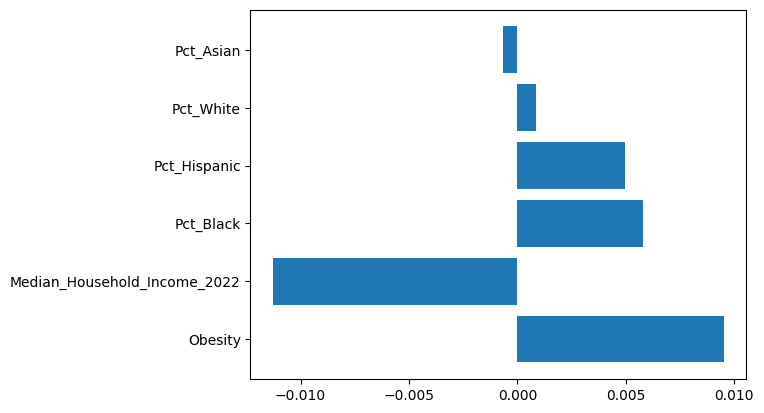

Index(['Obesity', 'Median_Household_Income_2022', 'Pct_Black', 'Pct_Hispanic',
       'Pct_White', 'Pct_Asian'],
      dtype='object') [ 0.00952178 -0.01127111  0.00577687  0.00497155  0.00086688 -0.00067192]


In [11]:
import matplotlib.pyplot as plt

features = X_scaled.columns
coef = model.coef_
plt.barh(features, coef)
plt.show()

print(features, coef)

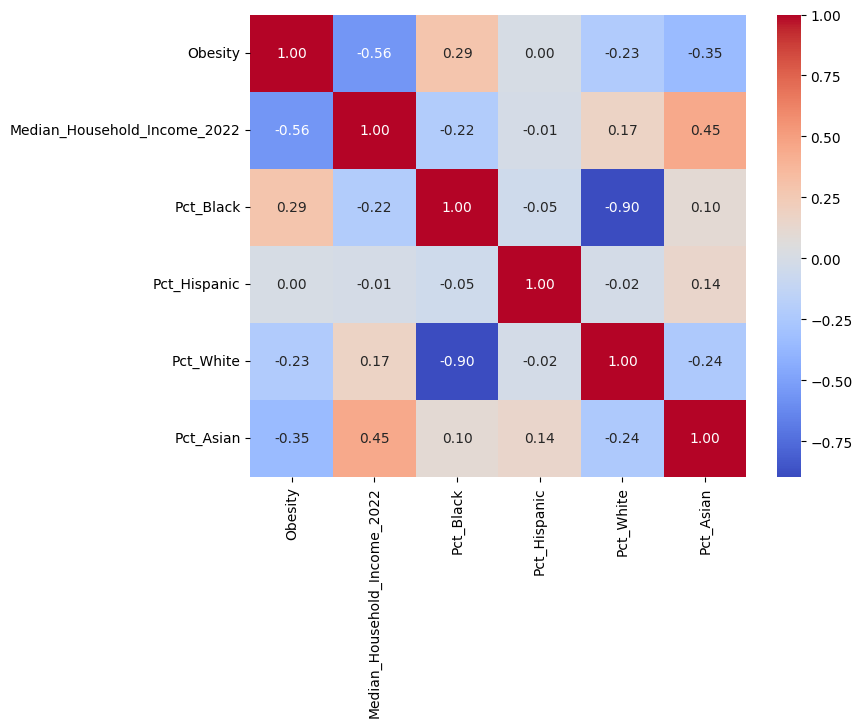

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

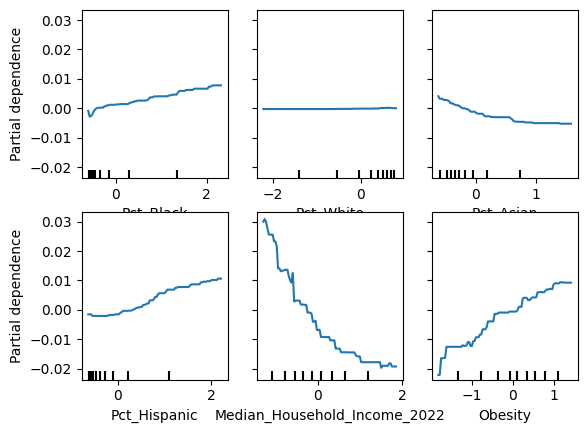

In [13]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor().fit(X_scaled, y)
PartialDependenceDisplay.from_estimator(gb_model, X_scaled, features=["Pct_Black", "Pct_White", "Pct_Asian", "Pct_Hispanic", "Median_Household_Income_2022", "Obesity"])
plt.show()

In [14]:
std_df = pd.DataFrame({"Feature": X.columns, "Standard Deviation": scaler.scale_})

print(std_df)

                        Feature  Standard Deviation
0                       Obesity            0.042199
1  Median_Household_Income_2022           15.060400
2                     Pct_Black            0.139616
3                  Pct_Hispanic            0.150321
4                     Pct_White            0.153232
5                     Pct_Asian            0.021344


In [15]:
df[["Pct_Asian", "Diabetes"]].corr()


,Pct_Asian,Diabetes
Pct_Asian,1.000000,-0.303105
Diabetes,-0.303105,1.000000


<Axes: xlabel='Pct_Hispanic', ylabel='Diabetes'>

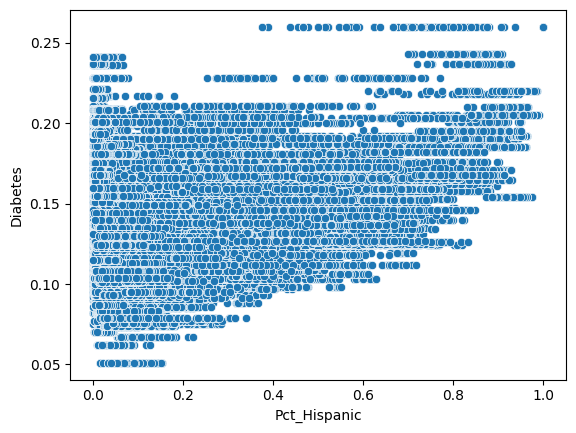

In [16]:
sns.scatterplot(x="Pct_Hispanic", y=y, data=df)

In [17]:
df[df['Median_Household_Income_2022'] < 45000][['Pct_Hispanic', 'Diabetes']].corr()

,Pct_Hispanic,Diabetes
Pct_Hispanic,1.000000,0.273274
Diabetes,0.273274,1.000000


In [18]:
df[(df["Median_Household_Income_2022"] > 60000) & (df["Median_Household_Income_2022"] < 79999)][["Pct_Asian", "Diabetes"]].corr()


,Pct_Asian,Diabetes
Pct_Asian,1.000000,-0.161255
Diabetes,-0.161255,1.000000


In [19]:
df[["Pct_Asian", "Obesity"]].corr()

,Pct_Asian,Obesity
Pct_Asian,1.000000,-0.352114
Obesity,-0.352114,1.000000


In [20]:
df[df["Pct_Asian"] > 0.2]["Annual Checkup"].mean()


np.float64(74.94666666666666)

In [21]:
df["Annual Checkup"].mean()


np.float64(76.41991297277103)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
df = df.drop(columns=["index", "level_0"], errors="ignore")
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.groupby('Cluster')[["Pct_Asian"]].mean()

cluster_means = df.groupby("Cluster").mean(numeric_only=True)

cluster_means.T.loc[["Pct_Asian", "Current Cigarette Smoking", "Food Insecurity", "Physical Inactivity" ,"High Cholesterol", "Obesity", "Short Sleep Duration", "Social Isolation"]]

Cluster,0,1,2,3
Pct_Asian,0.008049,0.011085,0.053422,0.013241
Current Cigarette Smoking,17.846683,19.353320,12.588451,16.661535
Food Insecurity,13.606354,23.227973,10.988059,22.264661
Physical Inactivity,27.921833,32.613942,21.132534,32.067084
High Cholesterol,37.487617,37.566660,34.033722,37.210310
Obesity,38.438634,42.005382,31.931563,39.307898
Short Sleep Duration,35.484846,39.612253,33.337257,37.362443
Social Isolation,32.195782,34.499922,32.137526,35.677626


Median_Household_Income_2022       -9518.367850
Colorectal Cancer Screening           -7.956245
Mammography                           -4.955809
Dental Visit                          -4.658401
Annual Checkup                        -4.513703
Arthritis                             -3.255428
Cholesterol Screening                 -2.874054
High Blood Pressure Medication        -2.161453
High Blood Pressure                   -1.732564
Cancer (non-skin) or Melanoma         -1.088404
Current Asthma                        -0.681165
Depression                            -0.516501
COPD                                  -0.479094
Pct_Black                             -0.122687
Stroke                                -0.033591
Pct_Asian                             -0.010944
Current Cigarette Smoking              0.065384
Pct_White                              0.127063
Binge Drinking                         0.313595
Coronary Heart Disease                 0.402326
Pct_Hispanic                           0

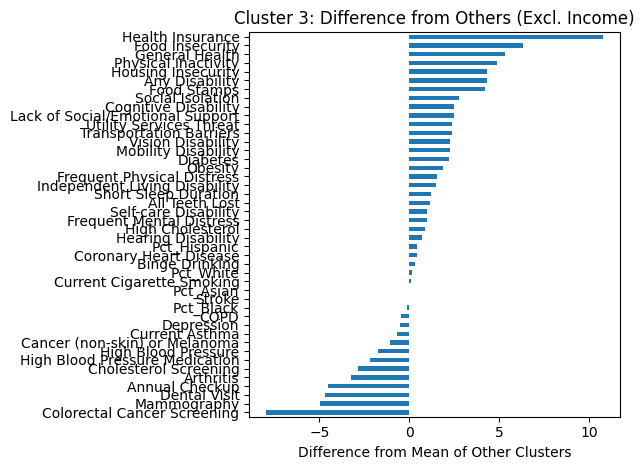

In [23]:
others_mean = cluster_means.drop(3).mean()
diff = cluster_means.loc[3] - others_mean

print(diff.sort_values())

diff_wo_income = diff.drop("Median_Household_Income_2022")

diff_wo_income.sort_values().plot(kind="barh", title="Cluster 3: Difference from Others (Excl. Income)")
plt.xlabel("Difference from Mean of Other Clusters")
plt.tight_layout()
plt.show()

In [24]:
import numpy as np

a = np.array([0.00952178,-0.01127111,  0.00577687 , 0.00497155  ,0.00086688 ,-0.00067192])
b = np.array([0.00860534, -0.01110521, 0.00368129, 0.0040041, -0.00242548, -0.0007583])

In [25]:
diff = a-b 
avg_diff = np.mean(diff)

print(f"avg diff: {avg_diff}")

avg diff: 0.0011987183333333335


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_demo = df[["Pct_Asian", "Pct_Black", "Pct_White", "Pct_Hispanic", "Median_Household_Income_2022"]]
X_behav = df[["Physical Inactivity", "Current Cigarette Smoking", "Social Isolation", "Short Sleep Duration", "Annual Checkup", "High Cholesterol"]]
y = df["Diabetes"]

X_train_d, X_test_d, y_train, y_test = train_test_split(X_demo, y, test_size=0.2, random_state=0)
X_train_b, X_test_b, _, _ = train_test_split(X_behav, y, test_size=0.2, random_state=0)

reg_d = LinearRegression().fit(X_train_d, y_train)
reg_b = LinearRegression().fit(X_train_b, y_train)

r2_d = r2_score(y_test, reg_d.predict(X_test_d))
r2_b = r2_score(y_test, reg_b.predict(X_test_b))

X_combined = pd.concat([X_demo, X_behav], axis=1)
X_train_c, X_test_c, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=0)
reg_c = LinearRegression().fit(X_train_c, y_train)
r2_c = r2_score(y_test, reg_c.predict(X_test_c))
print(f"R^2 for demographic model: {r2_d:.4f}")
print(f"R^2 for behavioral model: {r2_b:.4f}")

R^2 for demographic model: 0.5655
R^2 for behavioral model: 0.8454
